## In this notebook

- Check data.

In [1]:
import os

# analytics
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
import numpy as np

# plot
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
DATA_FOLDER = "../data"

METADATA_FILEPATH = "../data/metadata.csv"

In [3]:
! ls -l $DATA_FOLDER

total 1508
-rw-r--r-- 1 nobody nogroup 1071430 Feb  6 15:02 metadata.csv
-rw-r--r-- 1 nobody nogroup   89581 Feb  6 15:02 submission_format.csv
-rw-r--r-- 1 nobody nogroup  377581 Feb  6 15:02 train_labels.csv


## Load data

In [4]:
%%time

df = (
    pd
    .read_csv(METADATA_FILEPATH)
)

df.date = pd.to_datetime(df.date)
df.tail()

CPU times: user 17.5 ms, sys: 7.03 ms, total: 24.5 ms
Wall time: 24.3 ms


,uid,latitude,longitude,date,split
23565,zzvv,36.708500,-121.749000,2014-12-02,test
23566,zzwo,39.792190,-99.971050,2017-06-19,train
23567,zzwq,35.794000,-79.012551,2015-03-24,train
23568,zzyb,35.742000,-79.238600,2016-11-21,train
23569,zzzi,39.767323,-96.028617,2015-08-31,test


## Check distributions

In [5]:
# split

(
    df
    .split
    .value_counts()
)

train    17060
test      6510
Name: split, dtype: int64

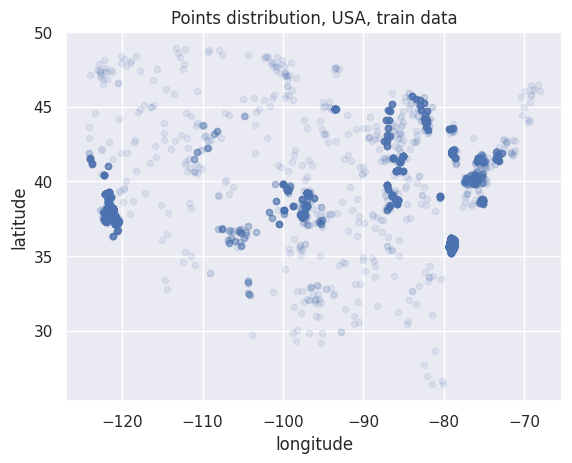

In [6]:
# split within country

SPLIT = "train"

ax = (
    df
    .loc[df.split == SPLIT]
    .plot(x="longitude", y="latitude", alpha=0.1, kind="scatter")
)

# ax.set_xlabel("X axis label")
# ax.set_ylabel("Y axis label")
ax.set_title(f"Points distribution, USA, {SPLIT} data")

plt.show()

In [7]:
# what is the date range?

(
    df
    .groupby("split")
    .agg(
        min_date=("date", min), 
        max_date=("date", max)
    )
)

,min_date,max_date
split,,
test,2013-01-08,2021-12-29
train,2013-01-04,2021-12-14


Text(0.5, 1.0, 'Distribution of years in the data')

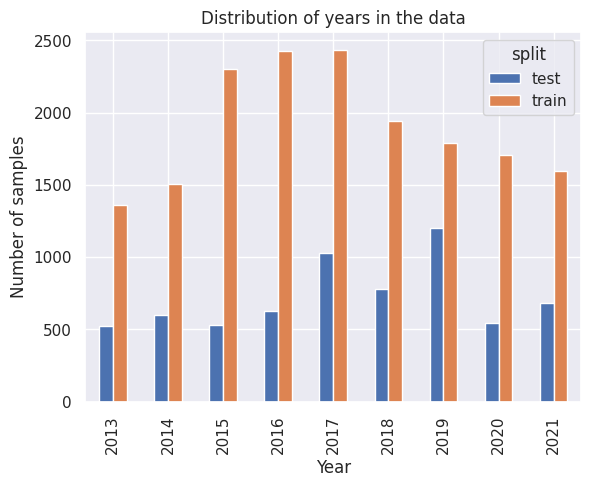

In [8]:
# what years are in the data?

(
    pd
    .crosstab(df.date.dt.year, df.split)
    .plot(kind="bar")
)

plt.ylabel("Number of samples")
plt.xlabel("Year")
plt.title("Distribution of years in the data")

## Results

- Checked metadata.